In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("fico.csv")

In [5]:
# Analyzing different ways of Data Cleaning, we decide to Use Method 1
df["FICO"].fillna(0, inplace=True)

In [6]:
df.dtypes

acct_id     int64
FICO       object
dtype: object

In [7]:
df = df[df["FICO"].str.contains("AA") == False]

In [8]:
df = df[df["FICO"].str.contains("SSS") == False]

In [9]:
df["FICO"] = df["FICO"].astype(float)

In [10]:
df.dtypes

acct_id      int64
FICO       float64
dtype: object

In [28]:
max_value = df["FICO"].max()
min_value = df["FICO"].min()

In [12]:
min_value

420.0

In [13]:
max_value

850.0

In [14]:
# I segregate FICO Scores of each customer into 5 buckets, and construct an histogram in order to identify customers with 
# good FICO Scores and analyze the number of customers with higher credits.
# Using linspace I segregate the data into 5 buckets ranging from the minimum FICO score to the maximum FICO Score

In [15]:
bins = np.linspace(min_value,max_value,5)
bins

array([420. , 527.5, 635. , 742.5, 850. ])

In [16]:
df['bins'] = pd.cut(df['FICO'], bins=bins, include_lowest=True)
df['bins']

0         (742.5, 850.0]
1         (742.5, 850.0]
2         (635.0, 742.5]
3         (742.5, 850.0]
4         (742.5, 850.0]
               ...      
99998     (742.5, 850.0]
99999     (742.5, 850.0]
100001    (742.5, 850.0]
100002    (742.5, 850.0]
100004    (742.5, 850.0]
Name: bins, Length: 70396, dtype: category
Categories (4, interval[float64]): [(419.999, 527.5] < (527.5, 635.0] < (635.0, 742.5] < (742.5, 850.0]]

In [17]:
# Count of each bin value 
# Number of customers under each segment
x = pd.cut(df['FICO'], bins=5).value_counts()
x

(764.0, 850.0]     48460
(678.0, 764.0]     16875
(592.0, 678.0]      4128
(506.0, 592.0]       838
(419.57, 506.0]       95
Name: FICO, dtype: int64

(array([   89.,   832.,  4016., 16734., 48725.]),
 array([420., 506., 592., 678., 764., 850.]),
 <BarContainer object of 5 artists>)

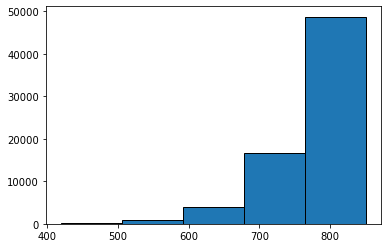

In [18]:
plt.hist(df['FICO'],edgecolor = 'black', bins=5)

In [19]:
# A FICO score is a three-digit number, typically on a 300-850 range, that tells lenders how likely a consumer is to repay 
# borrowed money based on their credit history.

In [20]:
# From the above histogram , we observe that majority of the individuals have FICO-Score more in the range 800 or more.
# Higher score indicates better credit, so approximately 50000 individuals have a very high FICO Score.
# On average, The FICO company itself defines a good score as 670-739, Basing upon those results we observe that 4267 people 
# have a low FICO Score and tend to achieve lower credits than the other who have a FICO Score of more than 670.
a = pd.cut(df['FICO'], bins=[420,670]).value_counts()
a

(420, 670]    4267
Name: FICO, dtype: int64

In [21]:
# We can conclude that despite having individuals with a higher or balanced FICO Scores, there are still a number of customers 
# who are having lower Scores and tend to achieve lesser credit. But, in the real world scenario, I think that there will
# be more number of individuals who will tend to have lower FICO Scores, but this data will be based upon region to region.
# So the ranges will differ over different places and basing upon that we infer our conclusions.

In [23]:
df1 = pd.read_csv("region.csv")

In [24]:
df1.head(10)

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia
5,6,New York
6,7,San Antonio
7,8,San Antonio
8,9,Houston
9,10,Philadelphia


In [40]:
pd3 = pd.merge(left=df,right=df1,how='inner')
pd3

,acct_id,FICO,bins,region
0,1,768.0,"(742.5, 850.0]",New York
1,2,850.0,"(742.5, 850.0]",Dallas
2,3,677.0,"(635.0, 742.5]",Los Angeles
3,4,843.0,"(742.5, 850.0]",Chicago
4,5,796.0,"(742.5, 850.0]",Philadelphia
...,...,...,...,...
70564,99986,836.0,"(742.5, 850.0]",Phoenix
70565,99987,850.0,"(742.5, 850.0]",Los Angeles
70566,99989,850.0,"(742.5, 850.0]",Los Angeles
70567,99990,830.0,"(742.5, 850.0]",Chicago


In [38]:
df['FICO'].nsmallest(2)

7606     420.0
85879    433.0
Name: FICO, dtype: float64

In [44]:
pd3[(pd3["FICO"] == 420.0) | (pd3["FICO"] == 433.0)]

,acct_id,FICO,bins,region
4238,7602,420.0,"(419.999, 527.5]",Houston
61379,85867,433.0,"(419.999, 527.5]",San Antonio


In [ ]:
# PART A DONE